In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('data/cars.csv', index_col='Unnamed: 0')
df

,speed,dist
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10
7,10,18
8,10,26
9,10,34
10,11,17


In [3]:
x_data = df['speed'].values
y_data = df['dist'].values

In [7]:
y_data

array([  2,  10,   4,  22,  16,  10,  18,  26,  34,  17,  28,  14,  20,
        24,  28,  26,  34,  34,  46,  26,  36,  60,  80,  20,  26,  54,
        32,  40,  32,  40,  50,  42,  56,  76,  84,  36,  46,  68,  32,
        48,  52,  56,  64,  66,  54,  70,  92,  93, 120,  85])

In [4]:
x = tf.constant( x_data, tf.float32)
y = tf.constant( y_data, tf.float32)
w = tf.Variable( tf.random.uniform( [1] ) )
b = tf.Variable( tf.random.uniform( [1] ) )

In [5]:
@tf.function
def compute_cost():
    hx = w*x + b
    cost = tf.reduce_mean( (hx-y)**2)
    return cost

In [6]:
optimizer = Adam( learning_rate=0.01)
hist_cost =[]
for i in range(2000):
    with tf.GradientTape() as tape:
        cost = compute_cost() #y = tf.reduce_mean( (w*x+b-y)**2)
    gradients = tape.gradient( cost, [w,b] )
    optimizer.apply_gradients(  zip( gradients, [w,b] ) )
    c = cost.numpy()
    hist_cost.append( c )
    print(i, 'cost:',  c)

0 cost: 1577.785
1 cost: 1565.3553
2 cost: 1552.9862
3 cost: 1540.6791
4 cost: 1528.435
5 cost: 1516.2546
6 cost: 1504.139
7 cost: 1492.0894
8 cost: 1480.1062
9 cost: 1468.1907
10 cost: 1456.3433
11 cost: 1444.5653
12 cost: 1432.8575
13 cost: 1421.2202
14 cost: 1409.6542
15 cost: 1398.1605
16 cost: 1386.7395
17 cost: 1375.3918
18 cost: 1364.1182
19 cost: 1352.919
20 cost: 1341.7944
21 cost: 1330.7454
22 cost: 1319.772
23 cost: 1308.8749
24 cost: 1298.0541
25 cost: 1287.3102
26 cost: 1276.6432
27 cost: 1266.0535
28 cost: 1255.5411
29 cost: 1245.1062
30 cost: 1234.7491
31 cost: 1224.4698
32 cost: 1214.2686
33 cost: 1204.145
34 cost: 1194.0995
35 cost: 1184.1316
36 cost: 1174.2417
37 cost: 1164.4297
38 cost: 1154.6952
39 cost: 1145.0385
40 cost: 1135.4592
41 cost: 1125.9572
42 cost: 1116.5323
43 cost: 1107.1844
44 cost: 1097.9135
45 cost: 1088.719
46 cost: 1079.601
47 cost: 1070.559
48 cost: 1061.5927
49 cost: 1052.7023
50 cost: 1043.8871
51 cost: 1035.147
52 cost: 1026.4814
53 cost: 1017

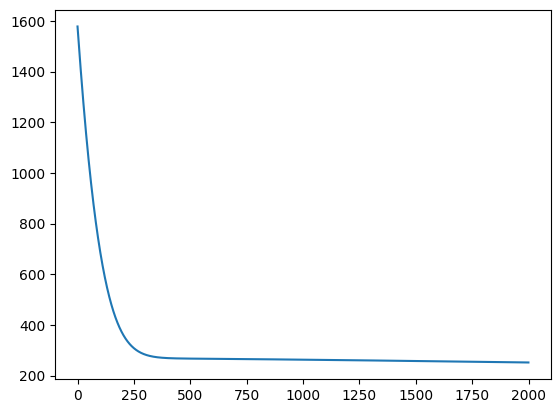

In [7]:
plt.plot( hist_cost )
plt.show()

In [14]:
def hxFn( xdata):
    hx = w*xdata + b
    return hx.numpy()

In [15]:
hxFn( 30 )

array([87.072075], dtype=float32)

In [ ]:
# 퀴즈 20,24 인 경우 제동거리 예측하시요.
hxFn( [20,24] )

array([58.047283, 69.6572  ], dtype=float32)

In [22]:
pred =hxFn( x_data )

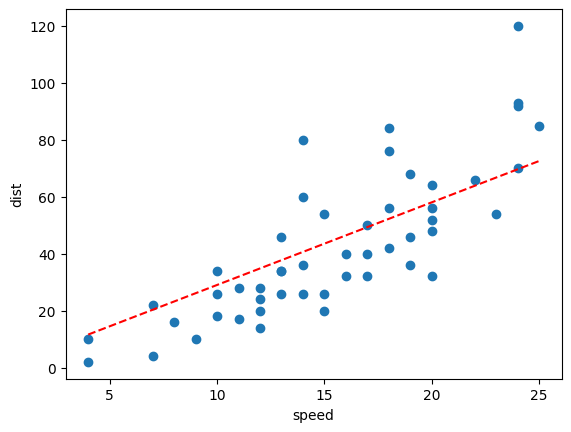

In [24]:
plt.scatter( x_data, y_data )
plt.plot( x_data, pred,'r--')
plt.xlabel('speed')
plt.ylabel('dist')
plt.show()

In [19]:
df

,speed,dist
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10
7,10,18
8,10,26
9,10,34
10,11,17


In [12]:
w.numpy().item()

2.9024791717529297

In [13]:
b.numpy().item()

-0.0023000151850283146